In [18]:
#autoreload to prevent restarting the kernel when changing the code

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
#import dependency

import sys

sys.path.append("../src") # go to parent dir

from crisis_ensemble_exp import train_base_models, evaluate_base_models, evaluate_ensemble_models

from crisis_models import (ensemble_disaster,ensemble_disaster_mix,load_model_crisis,train_model_crisis, 
                          make_idg, evaluate_model_crisis, ensemble, make_prediction_ensemble_disaster, 
                          make_prediction_supermodel)

from crisis_datasets import Dataset, load_crisis_dataset, put_supermodel_data

from crisis_utility import (sorted_result_notinf, sorted_result_inf, get_class_inf, get_class, get_true_class, 
                            get_index_different_prediction, get_index_same_prediction, show_image_different_prediction, 
                            show_image_same_prediction, plot_confusion)

from calib import load_data

In [20]:
# to prevent GPU used exclusively
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

**Train and evaluate base classifier**

In [24]:
#train base model : VGG16, Densenet201, MobileNetV2, InceptionV3, Resnet50
train_base_models()

vgg16 harvey_all
vgg16 has already been trained in dataset harvey_all
densenet harvey_all
densenet has already been trained in dataset harvey_all
mobilenetv2 harvey_all
mobilenetv2 has already been trained in dataset harvey_all
inceptionv3 harvey_all
inceptionv3 has already been trained in dataset harvey_all
resnet50 harvey_all
resnet50 has already been trained in dataset harvey_all
vgg16 irma_all
vgg16 has already been trained in dataset irma_all
densenet irma_all
densenet has already been trained in dataset irma_all
mobilenetv2 irma_all
mobilenetv2 has already been trained in dataset irma_all
inceptionv3 irma_all
inceptionv3 has already been trained in dataset irma_all
resnet50 irma_all
resnet50 has already been trained in dataset irma_all
vgg16 maria_all
vgg16 has already been trained in dataset maria_all
densenet maria_all
densenet has already been trained in dataset maria_all
mobilenetv2 maria_all
mobilenetv2 has already been trained in dataset maria_all
inceptionv3 maria_all
ince

In [ ]:
#evaluate base model
df_metrics = evaluate_base_models()

**Evaluate ensemble of disaster performance**

In [21]:
#disaster_name = ['irma_all','harvey_all','maria_all','mexico_all','iraq_all','california_all','srilanka_all']

disaster_name = 'california_all'

dataset_test = load_crisis_dataset(disaster_name) # the parameter is the excluded disaster
idg = make_idg()

In [22]:
#evaluate ensemble of disaster model

#disaster_ensemble = ['harvey_maria_irma','mexico_iraq','irma_harvey','harvey_maria','irma_maria','iraq_all_rerun','mexico_all','california_all','srilanka_all']

# disaster_ensemble list explanation
# harvey_maria_irma : all hurricanes
# mexico_iraq : all earthquakes

# irma_harvey : without maria hurricane
# harvey_maria : without irma hurricane
# irma_maria : without harvey hurricane

# iraq_all_rerun : iraq earthquake only
# mexico_all : mexico earthquake only

# california_all : california wildfires
# srilanka_all : srilanka floods

disaster_ensemble = ['harvey_maria_irma','mexico_iraq','srilanka_all']
disaster_dataset = [load_crisis_dataset(dataset) for dataset in disaster_ensemble]

model = ensemble_disaster_mix('densenet',disaster_dataset,disaster_ensemble)
model.compile(loss='sparse_categorical_crossentropy',
                              optimizer='adam',
                              metrics=['accuracy'])

res = evaluate_model_crisis(model,dataset_test,idg)
dict(zip(model.metrics_names,res))

[<keras.engine.functional.Functional object at 0x7f3e24f748b0>, <keras.engine.functional.Functional object at 0x7f3c08fd9160>, <keras.engine.functional.Functional object at 0x7f3e2516d610>]
Found 231 validated image filenames.
8/8 [==============================] - 9s 177ms/step - loss: 0.7304 - accuracy: 0.5931


{'loss': 0.730407178401947, 'accuracy': 0.5930736064910889}

**Show model confusion matrix**

Found 231 validated image filenames.


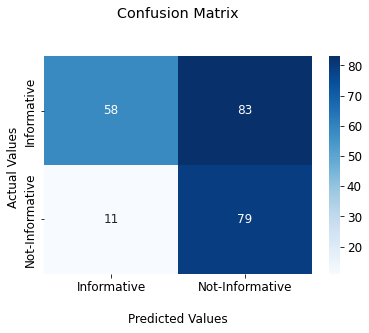

In [16]:
dataset = load_crisis_dataset(disaster_name)

filename = '/home/hafiz/Ensemble/ensemble_crisis/data/crisismmd_datasplit_all_individual/task_informative_california_test.tsv'
data_test = load_data(filename,'individual')
y_true_init = data_test['label_image_code'].values

tested_dataset = idg.flow_from_dataframe(
        dataset.test_data, directory = dataset.image_dir,
        target_size=(224, 224),
        x_col = dataset.image_column, y_col = dataset.label_column,
        class_mode = "raw", shuffle = False)

plot_confusion(model, tested_dataset, y_true_init)

**Show model classification results**